<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">

# Algoritmos genéticos

### Integrantes del grupo:
- David Guarín Castro - davidg@marketpsychdata.com
- Federico Otero - fede.e.otero@gmail.com



In [1]:
# Importo librerias
import random
import matplotlib.pyplot as plt
import numpy as np

### Ejercicio 1

Mediante un algoritmo genético desarrollado en Python encontrar el valor máximo de la función **y = x^2.**

**a. (Valor 0.6 puntos) Indicar en el informe (en .pdf) el resultado de la solución encontrada (valor de “x”) si se ejecuta el algoritmo 10 lanzamientos. Los parámetros del algoritmo son:**

- Selección por Ruleta
- Intervalo de la variable de decisión: [0, 31] ∈ Z
- Aplicar elitismo: Si
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce 0.92
- Probabilidad de mutación 0.1
- Tamaño de la población: 4
- Generaciones: 10

**b. (Valor 0.4 puntos) Indicar la URL del repositorio (o URL Colab) donde se encuentra el algoritmo resuelto.**

In [2]:
# Defino la función de aptitud
def aptitud(cromosoma):
    x = int(cromosoma, 2)
    return x ** 2

In [3]:
# Inicializo la poblacion
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma = ""
        for _ in range(longitud_cromosoma):
            cromosoma = cromosoma + str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion

In [4]:
# Seleccion por ruleta
def seleccion_ruleta(poblacion, aptitud_total):
    probabilidades = []
    for individuo in poblacion:
        prob = aptitud(individuo) / aptitud_total
        probabilidades.append(prob)
    probabilidades_acumuladas = []
    suma = 0
    for prob in probabilidades:
        suma = suma + prob
        probabilidades_acumuladas.append(suma)

    r = random.random()
    for i, acumulada in enumerate(probabilidades_acumuladas):
        if r <= acumulada:
            return poblacion[i]

In [5]:
# Cruce monopunto con probabilidad de cruza pc = 0.92
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)  # elijo aleatoriamente un punto de cruce
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2

In [6]:
# Mutacion
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado + str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado

In [50]:
# Esta funcion constituye un algoritmo genético que selecciona por ruleta, aplica cruces mono-punto, mutaciones y elitismo 
def ag_ruleta(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)

    #print(f'Población: {poblacion}')

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)
        aptitud_total = 0
        for cromosoma in poblacion:
            aptitud_total = aptitud_total + aptitud(cromosoma)

        print("Sumatoria de aptitudes total:", aptitud_total)

        # Selección de progenitores
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ruleta(poblacion, aptitud_total))
        #print(f'Veamos los progenitores: {progenitores}')

        # Cruce
        descendientes = []
        for i in range(0, tamanio_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #print(f'Progenitores: {progenitores}')
        #print(f'Descendientes: {descendientes}')

        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        #print(f'Descendientes mutados:  {descendientes_mutados}')

        # Elitismo
        poblacion.sort(key=aptitud)
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        mejor_individuo = max(poblacion, key=aptitud)
        print("Mejor individuo:", int(mejor_individuo, 2), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud)

In [51]:
# Definimos los parámetros
TAMANIO_POBLACION, LONGITUD_CROMOSOMA, PROB_MUTACION, PROB_CRUCE, GENERACIONES = (4, 5, 0.1, 0.92, 10)

In [ ]:
print("_________________________________________________________________________________")
print()
mejor_solucion = ag_ruleta(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, PROB_MUTACION, PROB_CRUCE, GENERACIONES)
print("Mejor solución:", int(mejor_solucion, 2), "Aptitud:", aptitud(mejor_solucion))


El punto **a** fue desarrollado anteriormente. Tanto sus resultados como el punto **b** figuran en el *pdf*.

### Ejercicio 2

Resolver las siguientes consignas:
**Minimizar** mediante tres algoritmos genéticos desarrollados en Python la función **y = x^2**.

**a. (Valor 0.5 puntos) Indicar en el informe (en .pdf) el resultado de la solución encontrada (valor de “x”) si se ejecutan los 3 algoritmos un total de 30 lanzamientos cada uno. Los parámetros de los algoritmos son:**
- Selección por Ranking, Ruleta y Torneo
- Intervalo de la variable de decisión: [-31, 31] ∈ R (con un dígito decimal)
- Aplicar elitismo: Si (solo en el método Ruleta y Ranking)
- Gen de cruza monopunto aleatorio
- Probabilidad de cruce 0.85
- Probabilidad de mutación 0.09
- Tamaño de la población: 4
- Generaciones: 10

**b. (Valor 0.75 puntos) Completar la siguiente tabla en base a las 30 ejecuciones con los parámetros señalados.**

**c. (Valor 0.75 puntos) Explicar (en el .pdf) una interpretación de los resultados obtenidos en el ítem anterior.**

**d. (Valor 1 punto) Modificar los parámetros Pm, Tamaño de la población y Generaciones de modo tal que se consiga encontrar una combinación que permita obtener el mejor valor óptimo y su correspondiente solución (para cada algoritmo habrá una combinación diferente). Transcribir las combinaciones encontradas en el .pdf.**

**e. (Valor 0.5 puntos) Realizar 6 curvas de convergencia; 3 correspondientes a los algoritmos con los parámetros originales y 3 correspondientes a los algoritmos con los mejores parámetros encontrados en el ítem d. Mostrar las 6 curvas en el .pdf. Las curvas deben contener título, leyenda y etiquetas en los ejes.**

**f. (Valor 0.5 puntos) Interpretar tanto las combinaciones de parámetros encontradas en cada uno de los 3 algoritmos como sus graficas de convergencia en el ítem anterior y explicarlas en el .pdf.**

Los puntos **b**, **c** y **f** se detallan en el *pdf*.

**a. Desarrollamos tres algoritmos genéticos: con selección por ruleta, con selección por torneo y con selección por ranking lineal.**

In [2]:
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma = ''
        for _ in range(longitud_cromosoma):
            cromosoma = cromosoma+str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion

In [3]:
def binario_a_decimal(cromosoma):
    decimal = int(cromosoma, 2)
    x = X_MIN + decimal * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)
    return x

In [4]:
def funcion_objetivo(x):
    return x ** 2

In [5]:
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma)
    return 1 / (funcion_objetivo(x) + EPSILON)

In [6]:
# Selección por ruleta
def seleccion_ruleta(poblacion, aptitud_total):
    probabilidades = []
    for individuo in poblacion:
        prob = aptitud(individuo) / aptitud_total
        probabilidades.append(prob)

    probabilidades_acumuladas = []
    suma = 0
    for prob in probabilidades:
        suma += prob
        probabilidades_acumuladas.append(suma)

    r = random.random()
    for i, acumulada in enumerate(probabilidades_acumuladas):
        if r <= acumulada:
            return poblacion[i]

In [13]:
# Selección por torneo
def seleccion_torneo(poblacion, tamanio_torneo=TAMANIO_TORNEO):
    progenitores = []
    for _ in range(len(poblacion)):
        candidatos = random.sample(poblacion, tamanio_torneo)
        progenitor = max(candidatos, key=aptitud)  # se selecciona el mejor individuo del torneo
        progenitores.append(progenitor)
    return progenitores

In [8]:
# Selección por ranking lineal
def seleccion_ranking(poblacion):
    aptitudes = []
    for individuo in poblacion:
        aptitudes.append(aptitud(individuo))
    poblacion_ordenada = sorted(zip(poblacion, aptitudes), key=lambda x: x[1])

    N = len(poblacion)
    s = 1.7
    probabilidades = []
    for i in range(N):
        prob = (2 - s) / N + (2 * i * (s - 1)) / (N * (N - 1))
        probabilidades.append(prob)

    r = random.random()
    suma = 0
    for i in range(N):
        suma = suma + probabilidades[i]
        if r <= suma:
            return poblacion_ordenada[i][0]

In [9]:
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2

In [10]:
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:
        if random.random() < tasa_mutacion:
            cromosoma_mutado = cromosoma_mutado + str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado

In [11]:
def algoritmo_genetico(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones, tipo_seleccion):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    resultados = []

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)
        aptitud_total = sum(aptitud(cromosoma) for cromosoma in poblacion)
        print("Aptitud total:", aptitud_total)

        # Selección de progenitores
        if tipo_seleccion == 'torneo':
            progenitores = seleccion_torneo(poblacion)
        elif tipo_seleccion == 'ruleta':
            progenitores = []
            for _ in range(tamanio_poblacion):
                progenitores.append(seleccion_ruleta(poblacion, aptitud_total))
        elif tipo_seleccion == 'ranking':
            progenitores = []
            for _ in range(tamanio_poblacion):
                progenitores.append(seleccion_ranking(poblacion))
        
        print(f'Tipo de seleccion: {tipo_seleccion}, progenitores: {progenitores}')

        # Cruce mono-punto
        descendientes = []
        for i in range(0, tamanio_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Elitismo
        if tipo_seleccion == 'torneo':
            poblacion = descendientes_mutados
        else:
            poblacion.sort(key=aptitud)
            descendientes_mutados.sort(key=aptitud, reverse=True)
            for i in range(len(descendientes_mutados)):
                if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                    poblacion[i] = descendientes_mutados[i]

        # Mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)

        print("mejor individuo en binario: ", mejor_individuo)
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

        resultados.append([binario_a_decimal(mejor_individuo), aptitud(mejor_individuo)])

    return max(poblacion, key=aptitud), resultados  # se retorna el mejor individuo

In [52]:
TAMANIO_POBLACION, LONGITUD_CROMOSOMA, PROB_MUTACION, PROB_CRUCE, GENERACIONES, X_MIN, X_MAX, EPSILON, TAMANIO_TORNEO = \
(4, 10, 0.09, 0.85, 30, -31, 31, 0.001, 3)

In [53]:
tipos_seleccion = ['ruleta', 'torneo', 'ranking']
comparacion_resultados = {}
for s in tipos_seleccion:
    print(f'Tipo de mecanismo de seleccion del algoritmo: por {s}')
    print("_________________________________________________________________________________")
    print()
    mejor_solucion, resultados = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, PROB_MUTACION, PROB_CRUCE, GENERACIONES, s)
    comparacion_resultados[s] = resultados
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

Tipo de mecanismo de seleccion del algoritmo: por ruleta
_________________________________________________________________________________

Generación: 1
Aptitud total: 0.023944197280688837
Tipo de seleccion: ruleta, progenitores: ['1010000110', '1010000110', '1010000110', '0011100111']
mejor individuo en binario:  1010000001
Mejor individuo: 7.848484848484851 Aptitud: 0.016233841495305837
_________________________________________________________________________________
Generación: 2
Aptitud total: 0.05070593233365615
Tipo de seleccion: ruleta, progenitores: ['1010000110', '1010000001', '1010000001', '1010000001']
mejor individuo en binario:  1001001000
Mejor individuo: 4.393939393939391 Aptitud: 0.051792798936597356
_________________________________________________________________________________
Generación: 3
Aptitud total: 0.09812527398572447
Tipo de seleccion: ruleta, progenitores: ['1001001000', '1001001000', '1010000001', '1001001000']
mejor individuo en binario:  1001001000
Mejo

**d. (Valor 1 punto) Modificar los parámetros Pm, Tamaño de la población y Generaciones de modo tal que se consiga encontrar una combinación que permita obtener el mejor valor óptimo y su correspondiente solución (para cada algoritmo habrá una combinación diferente). Transcribir las combinaciones encontradas en el .pdf.**

Aumentamos el tamaño de la población, la cantidad de generaciones y la probabilidad de mutación

In [54]:
TAMANIO_POBLACION, LONGITUD_CROMOSOMA, PROB_MUTACION, PROB_CRUCE, GENERACIONES, X_MIN, X_MAX, EPSILON, TAMANIO_TORNEO = \
(20, 10, 0.15, 0.85, 50, -31, 31, 0.001, 3)

In [55]:
tipos_seleccion = ['ruleta', 'torneo', 'ranking']
comparacion_resultados_optimizado = {}
for s in tipos_seleccion:
    print(f'Tipo de mecanismo de seleccion del algoritmo: por {s}')
    print("_________________________________________________________________________________")
    print()
    mejor_solucion, resultados = algoritmo_genetico(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, PROB_MUTACION, PROB_CRUCE, GENERACIONES, s)
    comparacion_resultados_optimizado[s] = resultados
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

Tipo de mecanismo de seleccion del algoritmo: por ruleta
_________________________________________________________________________________

Generación: 1
Aptitud total: 7.182770297568979
Tipo de seleccion: ruleta, progenitores: ['1000000110', '1000000110', '1000000110', '1000000110', '1000000110', '1000010100', '1000000110', '1000000110', '1000010100', '1000000110', '1010100011', '1000000110', '1000000110', '1000000110', '1000000110', '1000000110', '1000000110', '1000000110', '1000000110', '1000000110']
mejor individuo en binario:  1000000001
Mejor individuo: 0.09090909090908994 Aptitud: 107.93933987511356
_________________________________________________________________________________
Generación: 2
Aptitud total: 137.60878493832553
Tipo de seleccion: ruleta, progenitores: ['1000000001', '1000000100', '1000000001', '1000000001', '1000000001', '1000000001', '1000000001', '1000001110', '1000000001', '1000000001', '1000000001', '1000000100', '1000000001', '1000000001', '1000000100', '100

**e. (Valor 0.5 puntos) Realizar 6 curvas de convergencia; 3 correspondientes a los algoritmos con los parámetros originales y 3 correspondientes a los algoritmos con los mejores parámetros encontrados en el ítem d. Mostrar las 6 curvas en el .pdf. Las curvas deben contener título, leyenda y etiquetas en los ejes.**

Comparamos los algoritmos con **selección por ruleta**

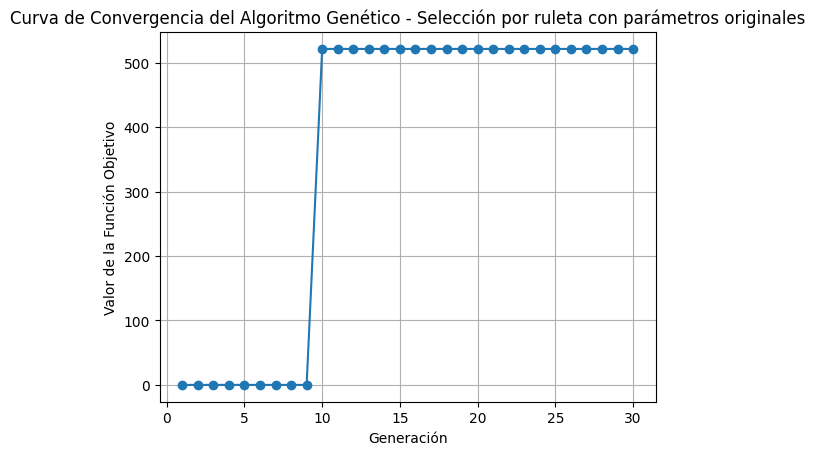

In [84]:
valores_originales = np.array(comparacion_resultados['ruleta'])[:, 1]
plt.plot(range(1, 30 + 1), valores_originales, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia del Algoritmo Genético - Selección por ruleta con parámetros originales')
plt.grid(True)
plt.show()

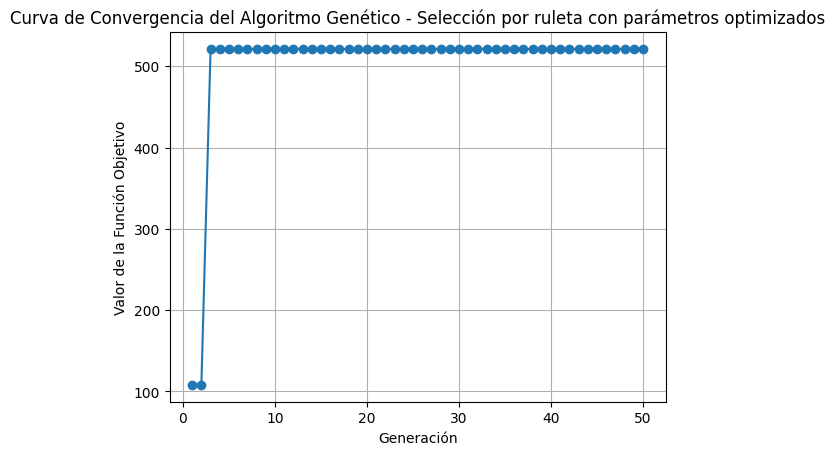

In [85]:
valores_optimizados = np.array(comparacion_resultados_optimizado['ruleta'])[:, 1]
plt.plot(range(1, 50 + 1), valores_optimizados, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia del Algoritmo Genético - Selección por ruleta con parámetros optimizados')
plt.grid(True)
plt.show()

Comparamos los algoritmos con **selección por torneo**

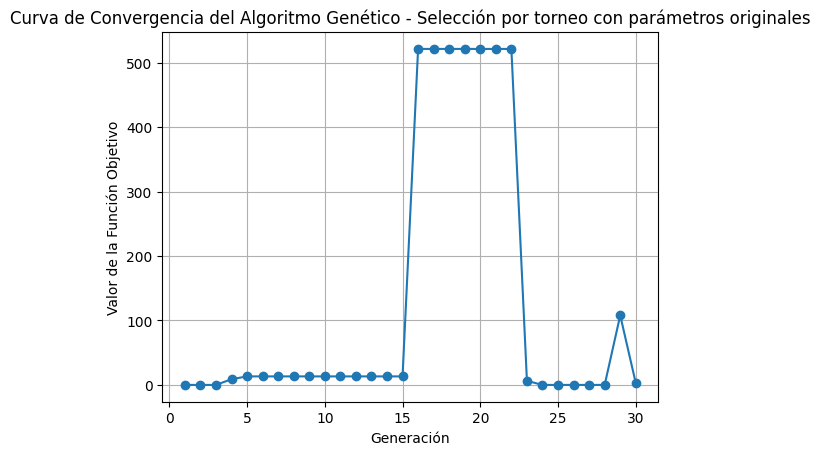

In [86]:
valores_originales = np.array(comparacion_resultados['torneo'])[:, 1]
plt.plot(range(1, 30 + 1), valores_originales, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia del Algoritmo Genético - Selección por torneo con parámetros originales')
plt.grid(True)
plt.show()

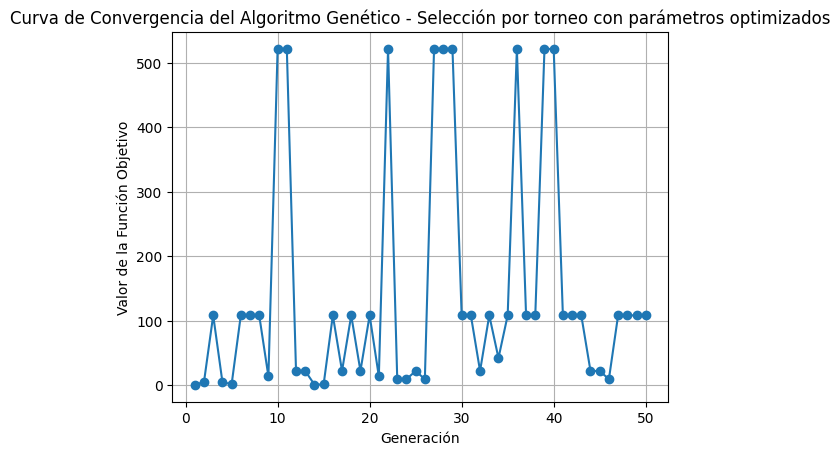

In [87]:
valores_optimizados = np.array(comparacion_resultados_optimizado['torneo'])[:, 1]
plt.plot(range(1, 50 + 1), valores_optimizados, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia del Algoritmo Genético - Selección por torneo con parámetros optimizados')
plt.grid(True)
plt.show()

Comparamos los algoritmos con **selección por ranking**

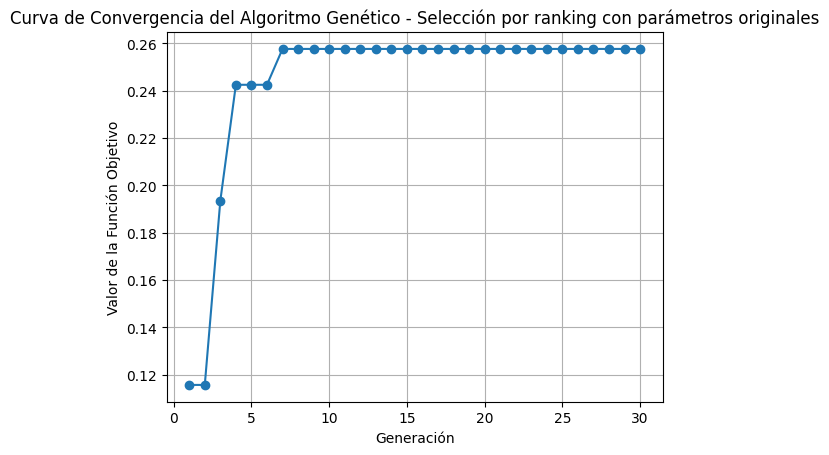

In [88]:
valores_originales = np.array(comparacion_resultados['ranking'])[:, 1]
plt.plot(range(1, 30 + 1), valores_originales, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia del Algoritmo Genético - Selección por ranking con parámetros originales')
plt.grid(True)
plt.show()

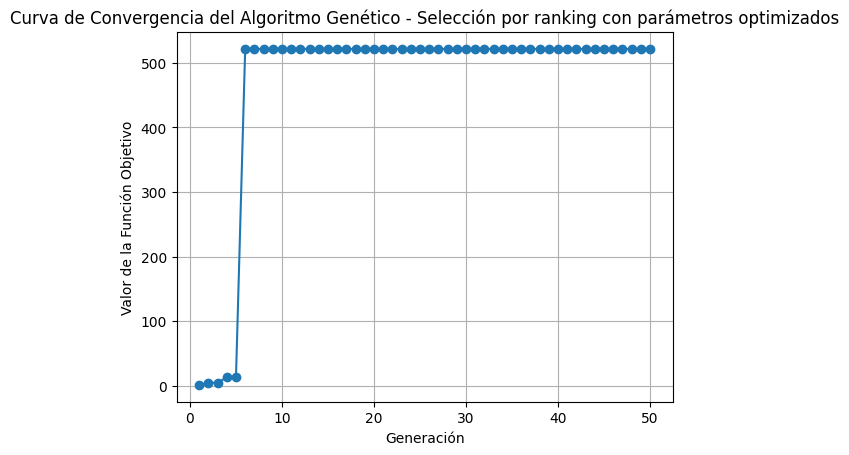

In [89]:
valores_optimizados = np.array(comparacion_resultados_optimizado['ranking'])[:, 1]
plt.plot(range(1, 50 + 1), valores_optimizados, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia del Algoritmo Genético - Selección por ranking con parámetros optimizados')
plt.grid(True)
plt.show()

### Ejercicio 3

La distribución de la concentración de cierto contaminante en un canal está descrita por la ecuación:

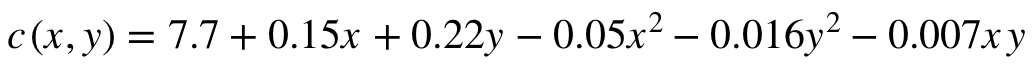

En donde, las variables independientes se encuentran entre los límites de –10 ≤ x ≤ 10, 0 ≤ y ≤ 20.
Para la función de adaptación anterior, escribir y ejecutar dos algoritmos genéticos que utilicen el operador de selección por ruleta y torneo respectivamente con probabilidades de cruza y mutación a elección. Luego realizar las siguientes consignas para ambos algoritmos:

**a. (Valor 1.5 puntos) Determinar en forma aproximada la concentración máxima dada la función c(x, y). Utilizar una precisión de 3 decimales. Transcribir en el .pdf el resultado obtenido en ambos algoritmos.**

**b. (Valor 0.5 puntos) Indicar la URL del repositorio (o URL Colab) donde se encuentra el algoritmo resuelto.**

**c. (Valor 0.75 puntos) Graficar c(x, y) en 3D para los intervalos de las variables independientes ya mencionados y agregar un punto rojo (ruleta) y un punto azul (torneo) en la gráfica en donde el algoritmo haya encontrado el valor máximo. Cada gráfico debe contener título, leyenda y etiquetas en los ejes.**

**d. (Valor 0.75 puntos) Graficar las mejores aptitudes encontradas en función de cada generación (Curva de convergencia de ambos algoritmos). Cada gráfico debe contener título, leyenda y etiquetas en los ejes.**

**e. (Valor 1.5 puntos) Realizar conclusiones/comentarios/observaciones respecto a los resultados obtenidos en ambos algoritmos.**

Para resolver este problema, vamos a utilizar individuos binarios. El rango de **x** es 20, y si utilizamos 3 decimales, tenemos que particionarlo en 20.000 rangos de igual tamaño. Por lo tanto, para x utilizaremos 15 bits, ya que **2^14 < x < 2^15**.
Por otro lado, **y** tiene rango también de 20, por lo que usaremos otros 15 bits. Con lo cual, cada individuo de la población constará de **30 bits**.

In [90]:
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for _ in range(tamanio_poblacion):
        cromosoma = ''
        for _ in range(longitud_cromosoma):
            cromosoma = cromosoma+str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion

In [145]:
def binario_a_decimal(cromosoma):
    individuo_x = cromosoma[:BITS_X]
    individuo_y = cromosoma[BITS_X:len(cromosoma)]
    decimal_x = int(individuo_x, 2)
    decimal_y = int(individuo_y, 2)
    x = X_MIN + decimal_x * (X_MAX - X_MIN) / ((2 ** len(individuo_x)) - 1)
    y = Y_MIN + decimal_y * (Y_MAX - Y_MIN) / ((2 ** len(individuo_y)) - 1)
    return x, y

In [158]:
def aptitud(cromosoma):
    x, y = binario_a_decimal(cromosoma)
    apt = 7.7 + 0.15 * x + 0.22 * y - 0.05 * x**2 - 0.016 * y**2 - 0.007 * x * y
    return apt

In [159]:
aver = aptitud(pob[0])

In [160]:
aver

7.900240350736646

In [151]:
pob = inicializar_poblacion(3, 30)

In [147]:
pob

['001100111000101100010010000011',
 '011110011111101010000000111000',
 '100000110001011011111000001100']

In [152]:
X_MIN, X_MAX, Y_MIN, Y_MAX, BITS_X = (-3, 12.1, 4.1, 5.8, 15)
#num_x, num_y = binario_a_decimal(pob[0], x_min, x_max, y_min, y_max, bits_x)
num_x, num_y = binario_a_decimal(pob[0])

In [153]:
num_x

-2.1465437788018433

In [154]:
num_y

4.716870632038331

In [98]:
num_x

4474358.99090909